In [10]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem import WordNetLemmatizer
from sklearn.cross_validation import cross_val_score


wnl = WordNetLemmatizer()
# read data from .json files
traindf = pd.read_json("train.json")
testdf = pd.read_json("test.json")

# clean spam from original ingredients, such as ( oz.), unwanted marks, etc.
# wnl seems not to be very useful
traindf['cleaned_ingredients'] = [' '.join([wnl.lemmatize(re.sub('[^A-Za-z]', ' ', item).strip().lower()) for item in lists]) for lists in traindf['ingredients']]
testdf['cleaned_ingredients'] = [' '.join([wnl.lemmatize(re.sub('[^A-Za-z]', ' ', item).strip().lower()) for item in lists]) for lists in testdf['ingredients']]

# gather labels into a single list
classes = list(set(traindf['cuisine']))

In [11]:
# try text mining package
import textmining
# Initialize class to create term-document matrix
tdm = textmining.TermDocumentMatrix()

for item in traindf['cleaned_ingredients']:
    tdm.add_doc(item)

tdm.write_csv('matrix.csv', cutoff = 1)

In [12]:
train_matrix = pd.read_csv('matrix.csv')

In [13]:
print train_matrix.shape

(39774, 3008)


In [15]:
Scores = train_matrix.sum(axis = 0)

id2label = {idx:item for (idx,item) in enumerate(train_matrix)}

drop_idx =[id2label[idx] for (idx,score) in enumerate(Scores) if score <= 0.001 * train_matrix.shape[0]]

In [16]:
# make a copy of the original train matrix
cleaned_train_matrix = train_matrix.copy()
cleaned_train_matrix.drop(drop_idx, axis=1, inplace = True)

In [17]:
print cleaned_train_matrix.shape

(39774, 196)


In [42]:
features = list(cleaned_train_matrix)
y, t = pd.factorize(traindf['cuisine'])

In [18]:
# Now let's build a random forest classifer
from sklearn.ensemble import RandomForestClassifier as RFC
# Try different n_estimators
n_estimators = np.arange(100,500,50)

In [46]:
oob_errors = []
for n in n_estimators:
    forest = RFC(n_jobs = -1, n_estimators = n, max_features = 'auto', oob_score = True)
    forest.fit(cleaned_train_matrix[features],y)
    oob_errors.append(1 - forest.oob_score_)

The optimal number of trees is 450
0.380876954795


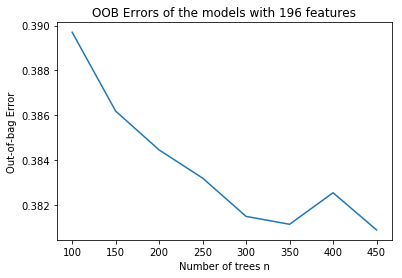

In [52]:
# determining best n
optimal_n = n_estimators[oob_errors.index(min(oob_errors))]
print("The optimal number of trees is %d" % optimal_n)
print min(oob_errors)

# plot oob error vs n
plt.plot(n_estimators, oob_errors)
plt.title('OOB Errors of the models with 196 features')
plt.xlabel('Number of trees n')
plt.ylabel('Out-of-bag Error')
plt.show()

In [48]:
# Test
forest = RFC(n_jobs = -1, n_estimators = optimal_n, max_features = 'auto', oob_score = True)
forest.fit(cleaned_train_matrix[features],y)
test_matrix = [[item.split().count(feature) for feature in features] for item in testdf['cleaned_ingredients']]
predictions = forest.predict(test_matrix)

In [49]:
resultdf = testdf.copy()
resultdf['cuisine'] = [t[prediction] for prediction in predictions]

In [50]:
resultdf.drop(['ingredients','cleaned_ingredients'],axis = 1)
resultdf.to_csv('result.csv')

Upload the result.csv to the competition website:

### Try Delete Factor = 0.001

In [53]:
drop_idx =[id2label[idx] for (idx,score) in enumerate(Scores) if score <= 0.001 * train_matrix.shape[0]]
cleaned_train_matrix = train_matrix.copy()
cleaned_train_matrix.drop(drop_idx, axis=1, inplace = True)
print cleaned_train_matrix.shape

(39774, 1131)


In [54]:
features = list(cleaned_train_matrix)
y, t = pd.factorize(traindf['cuisine'])
oob_errors = []
for n in n_estimators:
    forest = RFC(n_jobs = -1, n_estimators = n, max_features = 'auto', oob_score = True)
    forest.fit(cleaned_train_matrix[features],y)
    oob_errors.append(1 - forest.oob_score_)

The optimal number of trees is 350
0.285312012873


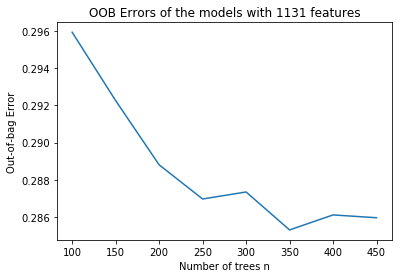

In [56]:
# determining best n
optimal_n = n_estimators[oob_errors.index(min(oob_errors))]
print("The optimal number of trees is %d" % optimal_n)
print min(oob_errors)

# plot oob error vs n
plt.plot(n_estimators, oob_errors)
plt.title('OOB Errors of the models with 1131 features')
plt.xlabel('Number of trees n')
plt.ylabel('Out-of-bag Error')
plt.show()

In [57]:
# Test
forest = RFC(n_jobs = -1, n_estimators = optimal_n, max_features = 'auto', oob_score = True)
forest.fit(cleaned_train_matrix[features],y)
test_matrix = [[item.split().count(feature) for feature in features] for item in testdf['cleaned_ingredients']]
predictions = forest.predict(test_matrix)

In [58]:
resultdf = testdf.copy()
resultdf['cuisine'] = [t[prediction] for prediction in predictions]
resultdf.drop(['ingredients','cleaned_ingredients'],axis = 1)
resultdf.to_csv('result.csv')

Upload the result.csv to the competition website: <img src="result2.png" width="80%">

### Try Delete Factor = 0.0001

In [59]:
drop_idx =[id2label[idx] for (idx,score) in enumerate(Scores) if score <= 0.0001 * train_matrix.shape[0]]
cleaned_train_matrix = train_matrix.copy()
cleaned_train_matrix.drop(drop_idx, axis=1, inplace = True)
print cleaned_train_matrix.shape

(39774, 3655)


In [60]:
features = list(cleaned_train_matrix)
y, t = pd.factorize(traindf['cuisine'])
oob_errors = []
for n in n_estimators:
    forest = RFC(n_jobs = -1, n_estimators = n, max_features = 'auto', oob_score = True)
    forest.fit(cleaned_train_matrix[features],y)
    oob_errors.append(1 - forest.oob_score_)

The optimal number of trees is 450
0.277191129884


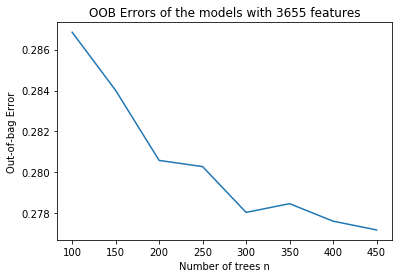

In [62]:
# determining best n
optimal_n = n_estimators[oob_errors.index(min(oob_errors))]
print("The optimal number of trees is %d" % optimal_n)
print min(oob_errors)

# plot oob error vs n
plt.plot(n_estimators, oob_errors)
plt.title('OOB Errors of the models with 3655 features')
plt.xlabel('Number of trees n')
plt.ylabel('Out-of-bag Error')
plt.show()

In [63]:
# Test
forest = RFC(n_jobs = -1, n_estimators = optimal_n, max_features = 'auto', oob_score = True)
forest.fit(cleaned_train_matrix[features],y)
test_matrix = [[item.split().count(feature) for feature in features] for item in testdf['cleaned_ingredients']]
predictions = forest.predict(test_matrix)

In [64]:
resultdf = testdf.copy()
resultdf['cuisine'] = [t[prediction] for prediction in predictions]
resultdf.drop(['ingredients','cleaned_ingredients'],axis = 1)
resultdf.to_csv('result.csv')

In [14]:
# use some feature selection methods
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pickle

features = train_matrix.columns
y, t = pd.factorize(traindf['cuisine'])
clf = ExtraTreesClassifier()
clf = clf.fit(train_matrix[features], y)
model = SelectFromModel(clf ,prefit = True)
importances = clf.feature_importances_
indices = np.argsort(importances)

In [15]:
id2label = {idx:item for (idx,item) in enumerate(train_matrix)}
drop_idx =[id2label[idx] for idx in indices[:-500]]
# make a copy of the original train matrix
cleaned_train_matrix = train_matrix.copy()
cleaned_train_matrix.drop(drop_idx, axis=1, inplace = True)

In [16]:
print cleaned_train_matrix.shape

(39774, 500)


In [19]:
features = list(cleaned_train_matrix)
y, t = pd.factorize(traindf['cuisine'])
oob_errors = []
for n in n_estimators:
    forest = RFC(n_jobs = -1, n_estimators = n, max_features = 'auto', oob_score = True)
    forest.fit(cleaned_train_matrix[features],y)
    oob_errors.append(1 - forest.oob_score_)

The optimal number of trees is 450
0.239503193041


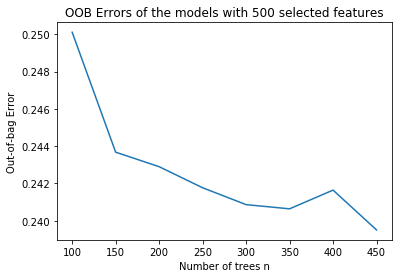

In [21]:
# determining best n
optimal_n = n_estimators[oob_errors.index(min(oob_errors))]
print("The optimal number of trees is %d" % optimal_n)
print min(oob_errors)

# plot oob error vs n
plt.plot(n_estimators, oob_errors)
plt.title('OOB Errors of the models with 500 selected features')
plt.xlabel('Number of trees n')
plt.ylabel('Out-of-bag Error')
plt.show()

In [22]:
# Test
forest = RFC(n_jobs = -1, n_estimators = optimal_n, max_features = 'auto', oob_score = True)
forest.fit(cleaned_train_matrix[features],y)
test_matrix = [[item.split().count(feature) for feature in features] for item in testdf['cleaned_ingredients']]
predictions = forest.predict(test_matrix)

In [25]:
resultdf = testdf.copy()
resultdf['cuisine'] = [t[prediction] for prediction in predictions]
resultdf[['id','cuisine']].to_csv('result.csv')

In [45]:
# Try svm
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import pickle

In [39]:
vectorizer = TfidfVectorizer(binary = True)
label_encoder = LabelEncoder()

vectorized_train = vectorizer.fit_transform(traindf['cleaned_ingredients']).astype('float16')
vectorized_test = vectorizer.transform(testdf['cleaned_ingredients']).astype('float16')
targets = label_encoder.fit_transform(traindf['cuisine'])

In [58]:
svm_optim_data = []
kf = KFold(n_splits = 5)
C = [1, 10, 100]
best_c = 0
min_error = 1
for c in C:
    error = 0
    for train_index,validation_index in kf.split(vectorized_train):
        x_trn, x_val = vectorized_train[train_index], vectorized_train[validation_index]
        y_trn, y_val = targets[train_index], targets[validation_index]
        clf = SVC(C=c, kernel='rbf', degree=3,
              gamma=1, coef0=1, shrinking=True, 
              probability=False, tol=0.001, cache_size=200,
              class_weight=None, verbose=True, max_iter=-1,
              decision_function_shape=None, random_state=None)
        model = OneVsRestClassifier(clf, n_jobs=1)
        model.fit(x_trn, y_trn)
        error += 1 - model.score(x_val,y_val)
    error = error / 5
    svm_optim_data.append([c,error])
    if error < min_error:
        min_error = error
        best_c = c

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [57]:
clf = SVC(C=best_c, kernel='rbf', degree=3,
              gamma=1, coef0=1, shrinking=True, 
              probability=False, tol=0.001, cache_size=200,
              class_weight=None, verbose=True, max_iter=-1,
              decision_function_shape=None, random_state=None)
best_model = OneVsRestClassifier(clf, n_jobs=-1)
best_model.fit(vectorized_train,targets)
y_test = best_model.predict(vectorized_test)
test_cuisine = label_encoder.inverse_transform(y_test)
submission_df = pd.DataFrame({'id': testdf['id'], 'cuisine': test_cuisine}, columns=['id', 'cuisine'])
submission_df.to_csv('svm_result.csv', index=False)

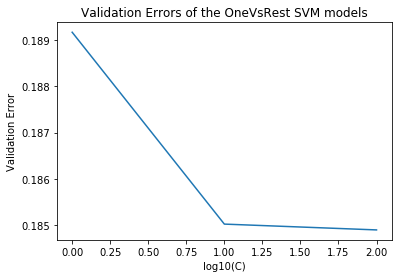

In [60]:
# plot validation error vs c
plt.plot(np.log10(C), [item[1] for item in svm_optim_data])
plt.title('Validation Errors of the OneVsRest SVM models')
plt.xlabel('log10(C)')
plt.ylabel('Validation Error')
plt.show()

In [61]:
print svm_optim_data

[[1, 0.18916871950863917], [10, 0.18502028714132027], [100, 0.18489456423460668]]
